### Creating a simple boxplot and bias map to show imbalances of the models

In [3]:
import sys
sys.path.insert(0,'../../')
sys.path.insert(0,'diagnostics')

from radiation import process_model_data, process_ceres_data
from radiation import boxplot_model_data, plot_mean_bias

In [4]:
%reload_ext autoreload
%autoreload 2

### Loading the data we need for the analysis

In [5]:
ceres_toa = process_ceres_data(exp = "ebaf-toa41", source = "monthly", level = 'toa', fix=True)
era5 = process_model_data(model = 'ERA5', exp = 'era5', source = 'monthly', fix = True, start_date = '1990-01-01', end_date = '2020-12-31')
ceres_sfc = process_ceres_data(exp = "ebaf-sfc41", source = "monthly", level = 'sfc', fix=True)
ifs_nemo_historical = process_model_data(model =  'IFS-NEMO' , exp = 'historical-1990' , source = 'lra-r100-monthly', fix = True, start_date = '1990-01-01', end_date = '2001-12-31')
ifs_nemo_ssp370 = process_model_data(model =  'IFS-NEMO' , exp = 'ssp370' , source = 'lra-r100-monthly', fix = True, start_date = '2020-01-01', end_date = '2037-12-31')

# icon_historical =  process_model_data(model =  'ICON' , exp = 'historical-1990' , source = 'lra-r100-monthly', fix = True, start_date = '1990-01-01', end_date = '2004-12-31')
# icon_ssp370 = process_model_data(model =  'ICON' , exp = 'ssp370' , source = 'lra-r100-monthly', fix = True, start_date = '2020-01-01', end_date = '2028-12-31')

2024-05-17 21:00:07 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi


/opt/conda/lib/python3.12/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]
2024-05-17 21:00:09 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi
2024-05-17 21:00:10 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi
/opt/conda/lib/python3.12/site-packages/xarray/core/indexing.py:1593: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]
2024-05-17 21:00:14 :: Reader :: WARNING  -> LRA_LUMI parameter is required but is missing, setting to default /work/bb1153/b382076/LRA-lumi
2024-05-17 21:00:14 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-05-17 21:00:14 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO

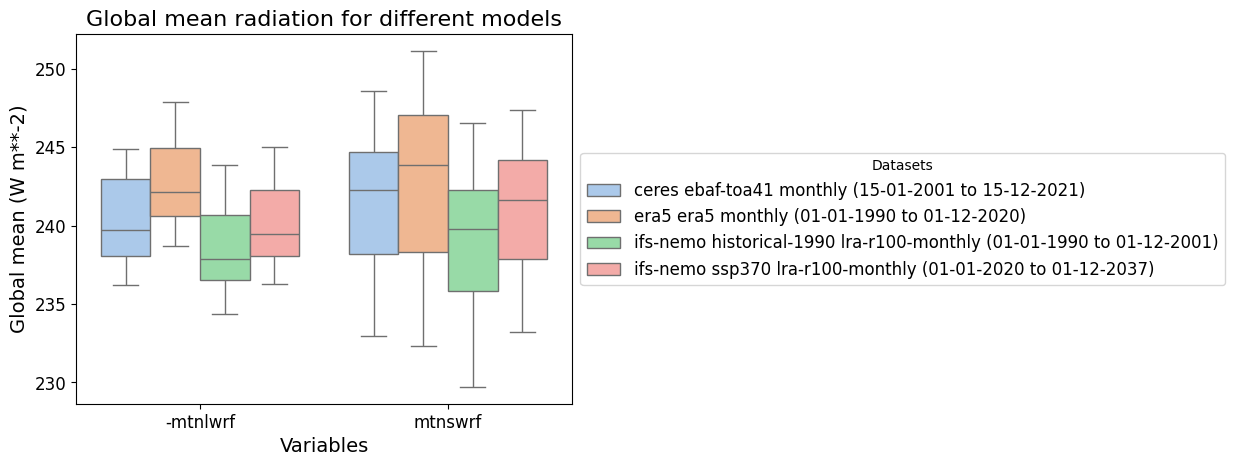

In [6]:
# datasets = [ceres_toa, era5, ifs_nemo_historical, ifs_nemo_ssp370, icon_historical, icon_ssp370]
datasets = [ceres_toa, era5, ifs_nemo_historical, ifs_nemo_ssp370]
variables = ['-mtnlwrf', 'mtnswrf']

boxplot_model_data(datasets=datasets,variables=variables)

In [7]:
# variables = ['tnr']

# boxplot_model_data(datasets=datasets,variables=variables)

In [8]:
# datasets = [ceres_sfc, era5, ifs_nemo_historical, ifs_nemo_ssp370]
# variables = ['-mslhf']

# boxplot_model_data(datasets=datasets,variables=variables)

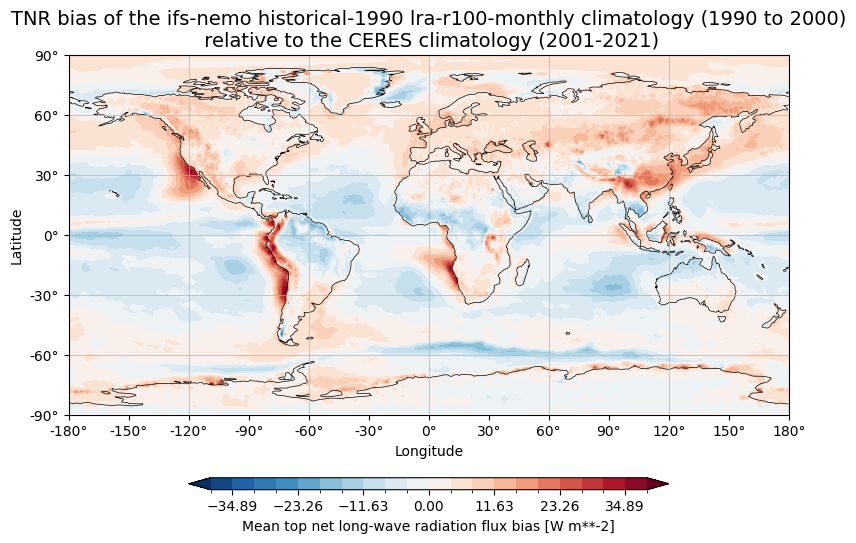

In [9]:
plot_mean_bias(ifs_nemo_historical, var='tnr', ceres=ceres_toa, start_year='1990', end_year='2000')

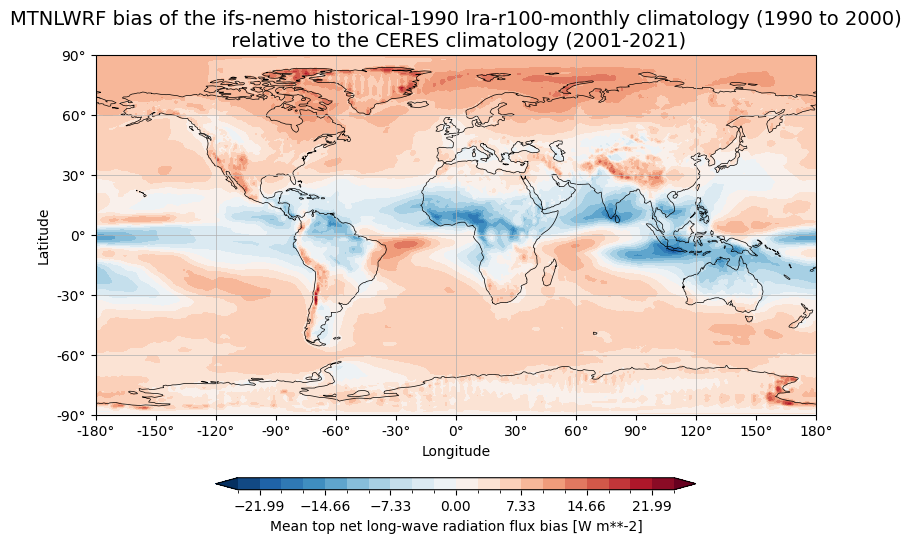

In [10]:
plot_mean_bias(ifs_nemo_historical, var='mtnlwrf', ceres=ceres_toa, start_year='1990', end_year='2000')

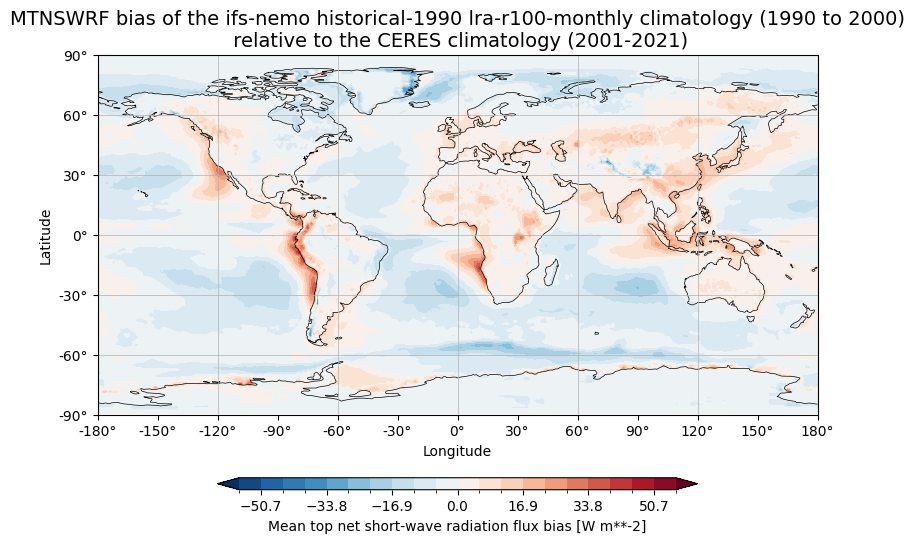

In [11]:
plot_mean_bias(ifs_nemo_historical, var='mtnswrf', ceres=ceres_toa, start_year='1990', end_year='2000')